## XGBOOST 

XGBoost, which stands for eXtreme Gradient Boosting, is an advanced and highly efficient implementation of the gradient boosting algorithm. Its theoretical concepts build on the foundation of gradient boosting but introduce several key enhancements that improve performance, speed, and generalization.

***

### Core Principles

At its heart, XGBoost is an **ensemble learning** method that combines the predictions of multiple weak learners, typically decision trees, to create a single strong predictive model. The process is **additive**, meaning it builds the model sequentially by adding new trees that correct the errors made by previous ones.

* **Boosting:** The core idea is that each new model is trained to minimize the **residuals** (the errors) of the previous models. This iterative process allows the algorithm to focus on the hardest-to-predict data points, progressively improving the model's accuracy.

* **Objective Function:** XGBoost's optimization is driven by a unique objective function that has two main components:
    * **Training Loss:** This measures how well the model's predictions align with the actual values. Common loss functions include Mean Squared Error (for regression) and Logistic Loss (for classification).
    * **Regularization Term:** This is a crucial addition that penalizes the complexity of the model. It helps prevent overfitting by discouraging the algorithm from building overly complex trees with too many leaves or large weights. This regularization uses both L1 (Lasso) and L2 (Ridge) penalties.

$$\text{Objective}(\theta) = \sum_{i} L(y_i, \hat{y}_i) + \sum_{k} \Omega(f_k)$$

* $L$ is the training loss function.
* $\Omega$ is the regularization term, which penalizes complexity.
* $f_k$ is the k-th decision tree.

***

### Enhancements Over Traditional Gradient Boosting

XGBoost's superior performance stems from several technical advancements compared to traditional Gradient Boosting Machines (GBMs):

* **Second-Order Taylor Approximation:** While traditional gradient boosting uses the first derivative of the loss function (the gradient), XGBoost uses a **second-order Taylor approximation** of the objective function. This means it considers both the first derivative (gradient) and the second derivative (Hessian). This provides a more precise and optimized direction for the model to follow, leading to faster convergence and better performance.

* **Regularized Boosting:** Unlike many traditional GBMs, XGBoost explicitly includes a regularization term in its objective function. This built-in regularization is a key reason for its ability to prevent overfitting and create more generalized models.

* **Parallel Processing:** While boosting is inherently a sequential process, XGBoost has a clever implementation that allows for parallel processing during the tree-building step. It sorts features and stores them in a memory-efficient block structure. This allows different feature splits to be evaluated in parallel, significantly speeding up training. 

* **Sparsity-Aware Algorithm:** XGBoost has a built-in mechanism to handle missing values automatically. It learns the best direction to take (left or right split) for data points with missing values, rather than requiring manual imputation. This feature is particularly useful for real-world datasets that often contain missing data.

* **Shrinkage and Column Subsampling:** XGBoost incorporates a **learning rate** (also known as shrinkage) that scales the contribution of each new tree. A small learning rate helps prevent overfitting by ensuring the model doesn't learn too much from any single tree. It also uses **column subsampling** (randomly selecting a subset of features for each tree) similar to Random Forests, which also helps to reduce overfitting and improve model robustness.

### Comparison table between Gradient Boosting Machine (GBM) and XGBOOST

| Feature / Concept           | Gradient Boosting Machine (GBM)               | XGBoost                                                                      |
| --------------------------- | --------------------------------------------- | ---------------------------------------------------------------------------- |
| **Optimization**            | Uses first-order gradient only                | Uses both first-order (gradient) and second-order (Hessian)                  |
| **Regularization**          | Limited control (shrinkage, subsampling)      | Explicit L1 (Lasso) & L2 (Ridge) regularization on tree weights              |
| **Overfitting Control**     | Mainly via shrinkage & early stopping         | More options: max\_depth, min\_child\_weight, gamma, reg\_alpha, reg\_lambda |
| **Tree Pruning**            | Grows trees until max\_depth, no post-pruning | Prunes trees using a minimum loss reduction (`gamma`)                        |
| **Handling Missing Values** | Requires preprocessing                        | Automatically handles missing values during training                         |
| **Parallelization**         | Limited (sequential boosting)                 | Highly optimized, supports parallelization and GPU                           |
| **Speed**                   | Slower, less optimized                        | Much faster due to cache optimization & parallel learning                    |
| **Scalability**             | Can struggle with very large datasets         | Designed for big data, out-of-core computation supported                     |
| **Accuracy**                | Strong baseline boosting method               | Usually better due to regularization + second-order optimization             |


In [ ]:
!pip install xgboost

## XGBOOST CODE

In [22]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, \
                              cross_val_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.manifold import TSNE 

In [6]:
# Load dataset
df = pd.read_csv("dia_clean.csv")
df.head()

,Unnamed: 0,preg,plas,pres,skin,mass,pedi,age,class
0,0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.0,43.1,2.288,33,1


In [8]:
# Separate features and target
X = df.drop(columns=["Unnamed: 0","class"], axis =1)
y = df["class"]
X.head()

,preg,plas,pres,skin,mass,pedi,age
0,6,148.0,72.0,35.0,33.6,0.627,50
1,1,85.0,66.0,29.0,26.6,0.351,31
2,8,183.0,64.0,29.0,23.3,0.672,32
3,1,89.0,66.0,23.0,28.1,0.167,21
4,0,137.0,40.0,35.0,43.1,2.288,33


In [10]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [104]:
# Define model
xgb = XGBClassifier(n_estimators = 200, 
                    use_label_encoder=False, 
                    eval_metric="logloss", 
                    learning_rate=0.08, 
                    max_depth = 6, 
                    reg_alpha=0.01, reg_lambda=5)


Accuracy scores: [0.80952381 0.76190476 0.75510204 0.7260274  0.78767123]
Mean accuracy: 0.7680458484763768


In [ ]:
# Stratified K-Fold CV
skf = StratifiedKFold(n_splits=5, shuffle=True, \
                                    random_state=42)
scores = cross_val_score(xgb, X_scaled, y, cv=skf,\
                              scoring="accuracy")
print("Accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

In [106]:
# --- Decision Boundary Plot using t-SNE to 2D ---
X_tsne = TSNE(n_components=2, perplexity = 30).fit_transform(X_scaled)
X_tsne

In [ ]:
xgb.fit(X_tsne, y)

x_min, x_max = X_tsne[:, 0].min() - 1, X_tsne[:, 0].max() + 1
y_min, y_max = X_tsne[:, 1].min() - 1, X_tsne[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = xgb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

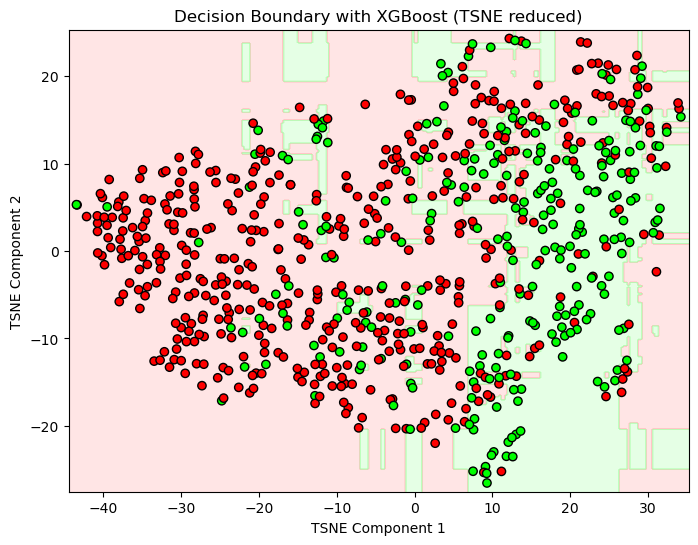

In [108]:
# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap( \
                                          ["#FFAAAA", "#AAFFAA"]))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, edgecolors="k",\
                       cmap=ListedColormap(["#FF0000", "#00FF00"]))
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.title("Decision Boundary with XGBoost (TSNE reduced)")
plt.show()
